# KNN_2
修改日期:2020/6/29

## 模型介紹
KNN是透過機器學習去辨認目標物較接近資料庫中的何種資料。<br/>
會根據資料附近中training的資料點去判斷testing的目標物為何，方法則是依據在目標物附近的資料，若A佔據的比例較多，則機器就會將目標物便認為A；若是B的比例較多，目標物則會被辨認為B。
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/320px-KnnClassification.svg.png?1593349430867'>
<br/>
以圖例解釋:<br/>
在k=3的情況下，中間綠色的圓形會被視為是紅色的三角形<br/>
在k=5的情況下，中間綠色的圓形會被視為是藍色的正方形<br/>


## 程式碼
安裝所需套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import *
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 資料輸入
開啟檔案 <br/>
將兩筆檔案的columns' names修正為相同的columns' names<br/>
<br/>

附註:
1. 需要把csv跟ipynb放到同一資料夾
2. 注意受試者是同一組

In [2]:
with open('013_b_1114_1_2_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
    data1 = data1.rename(columns = {'p1Cash':'Cash','p1Stock':'Stock','p1TotalAsset':'TotalAsset',
                                   'p1Decision':'Decision','p1ChechHistory':'CheckHistory'})
with open('014_b_1114_1_2_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
    data2 = data2.rename(columns = {'p2Cash':'Cash','p2Stock':'Stock','p2TotalAsset':'TotalAsset',
                                   'p2Decision':'Decision','p2ChechHistory':'CheckHistory'})

取所需資料(包含X,Y變項)

In [9]:
X = data1.loc[:,['Cash','StockPrice','TotalAsset']]
X['opp_TotalAsset'] = data2.loc[:,['TotalAsset']]
X['CheckHistory'] = pd.get_dummies(data1.loc[:,'CheckHistory'])['yes']

Y_data = data1.loc[:,'Decision']
Y =Y_data.to_numpy()

增加delta_Price作為X變項

In [10]:
X_1_101 = X[1:101]
X_1_101 = X_1_101.reset_index()
X_0_100 = X[0:100]
X_0_100 = X_0_100.rename(columns = {'Cash':'pre_Cash','StockPrice':'pre_StockPrice','TotalAsset':'pre_TotalAsset',
                                   'opp_TotalAsset':'pre_opp_TotalAsset','CheckHistory':'pre_CheckHistory'}, inplace = False)
X = pd.concat([X_1_101,X_0_100], axis=1)
X['delta_Price'] = X['StockPrice']-X['pre_StockPrice']
X_data = X[0:99]

# X = X.drop(['index','Cash','pre_Cash','StockPrice','pre_StockPrice','TotalAsset','pre_TotalAsset',
#                                    'opp_TotalAsset','pre_opp_TotalAsset','CheckHistory','pre_CheckHistory'], axis = 1)
X = X.drop(['index','pre_Cash','pre_StockPrice','pre_TotalAsset','pre_opp_TotalAsset','pre_CheckHistory','pre_StockPrice'], axis = 1)


### 稍微修正資料曲線
取該資料點的前五項與資料點本身算出平均值後，當作新的資料點<br/>
可以使資料曲線較平滑，也減少資料中出現local maximum或local minimum的出現

In [11]:
#smooth the data
k = 6
for i in range(0,6):
    X['row'+str(i)] = X.iloc[:,i].rolling(window = k).mean()
# X['smooth'] = X.rolling(window = 3).mean()
X = X.drop(['Cash','StockPrice','TotalAsset','opp_TotalAsset','CheckHistory','delta_Price'], axis = 1)
print(X)

X = preprocessing.scale(X, axis = 0)
X = X[k-1:99]
Y = Y[k-1:99]

            row0        row1          row2          row3      row4      row5
0            NaN         NaN           NaN           NaN       NaN       NaN
1            NaN         NaN           NaN           NaN       NaN       NaN
2            NaN         NaN           NaN           NaN       NaN       NaN
3            NaN         NaN           NaN           NaN       NaN       NaN
4            NaN         NaN           NaN           NaN       NaN       NaN
5   10215.666667   96.833333  10976.000000  10965.166667  1.000000 -1.166667
6   10249.166667   96.166667  10971.500000  10957.833333  1.000000 -0.666667
7   10282.000000   96.000000  10971.000000  10956.000000  0.833333 -0.166667
8   10347.000000   95.500000  10968.833333  10950.166667  0.833333 -0.500000
9   10380.166667   95.500000  10969.666667  10950.333333  0.833333  0.000000
10  10413.333333   95.166667  10968.833333  10946.500000  0.833333 -0.333333
11  10446.166667   95.166667  10970.666667  10946.000000  0.666667  0.000000

### 建構模型
將k值從1到31帶入模型，去找出在k值為多少時，可以有較佳的預測效果。<br/>
cross_validation設為5組，以5組的平均作為預測正確率。

In [12]:
#KNN model 
acc = []
for i in range(1,31):
    knn = neighbors.KNeighborsClassifier(i)
    scores = cross_val_score(knn,X,Y,cv=5,scoring='accuracy')
    print(scores)
    scores_mean = acc.append(scores.mean())

[0.26315789 0.31578947 0.47368421 0.36842105 0.33333333]
[0.31578947 0.47368421 0.42105263 0.31578947 0.55555556]
[0.31578947 0.47368421 0.68421053 0.52631579 0.55555556]
[0.36842105 0.52631579 0.57894737 0.52631579 0.55555556]
[0.36842105 0.42105263 0.63157895 0.52631579 0.55555556]
[0.31578947 0.52631579 0.52631579 0.57894737 0.55555556]
[0.36842105 0.57894737 0.57894737 0.63157895 0.55555556]
[0.42105263 0.52631579 0.63157895 0.57894737 0.55555556]
[0.47368421 0.57894737 0.63157895 0.57894737 0.55555556]
[0.47368421 0.57894737 0.52631579 0.52631579 0.55555556]
[0.47368421 0.57894737 0.52631579 0.57894737 0.55555556]
[0.52631579 0.57894737 0.57894737 0.52631579 0.55555556]
[0.57894737 0.52631579 0.52631579 0.57894737 0.55555556]
[0.57894737 0.52631579 0.52631579 0.42105263 0.55555556]
[0.57894737 0.52631579 0.52631579 0.36842105 0.55555556]
[0.68421053 0.52631579 0.52631579 0.52631579 0.55555556]
[0.63157895 0.52631579 0.52631579 0.52631579 0.55555556]
[0.52631579 0.52631579 0.526315

### 觀察結果
以圖表呈現k=1~31的結果。


Text(0, 0.5, 'Accuracy')

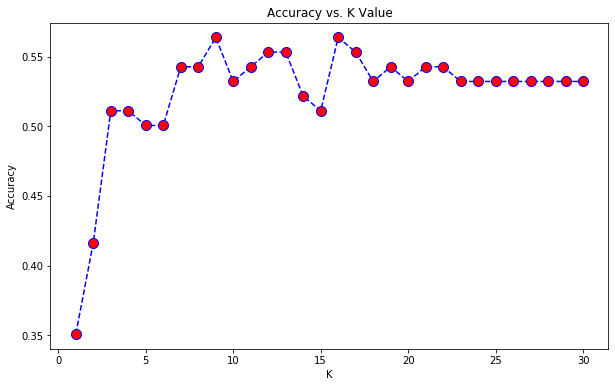

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')